In [1]:
%cd /content/drive/My Drive/ML_Projects/MaskRecognition

/content/drive/My Drive/ML_Projects/MaskRecognition


In [2]:
pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.1 MB/s 


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
import torch
from PIL import Image
import PIL
import matplotlib.pyplot as plt
from torch.utils.data import Subset, DataLoader,Dataset
!pip install kornia
import torch.nn as nn
import kornia
import random
import torch.nn.functional as F
from facenet_pytorch import MTCNN
import cv2
import os
from google.colab.patches import cv2_imshow
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 517 kB 8.7 MB/s 


In [14]:
mtcnn = MTCNN(margin=40, keep_all=True, device=device,post_process=False)


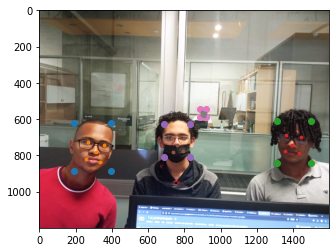

In [15]:
img_path = 'índice.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
boxes, probs, landmarks = mtcnn.detect(Image.fromarray(img), landmarks=True)



fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img)


for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)



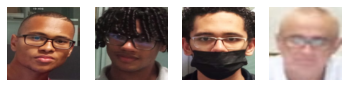

In [16]:
faces = mtcnn(Image.fromarray(img))

# Visualize
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

torch.Size([3, 160, 160])

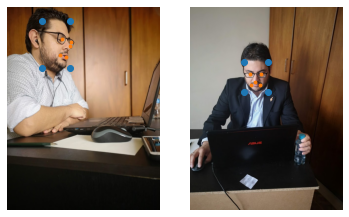

In [5]:
img20_path = 'train/No/no8.jpg'

img20 = cv2.imread(img20_path)
img20 = cv2.cvtColor(img20, cv2.COLOR_BGR2RGB)
boxes20, probs20, landmarks20 = mtcnn.detect(Image.fromarray(img20), landmarks=True)


img21_path = 'train/No/no7.jpg'
img21 = cv2.imread(img21_path)
img21 = cv2.cvtColor(img21, cv2.COLOR_BGR2RGB)
boxes21, probs21, landmarks21 = mtcnn.detect(Image.fromarray(img21), landmarks=True)


fig2 = plt.figure()
ax20 = fig2.add_subplot(121)
ax20.axis('off')
ax21 = fig2.add_subplot(122)
ax21.axis('off')

ax20.imshow(img20)
ax21.imshow(img21)


for box, landmark in zip(boxes20, landmarks20):
    ax20.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax20.scatter(landmark[:, 0], landmark[:, 1], s=8)

for box, landmark in zip(boxes21, landmarks21):
    ax21.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax21.scatter(landmark[:, 0], landmark[:, 1], s=8)

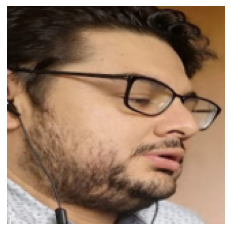

In [ ]:
face = mtcnn(Image.fromarray(img20))

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');


In [ ]:
face.shape

torch.Size([3, 160, 160])

In [7]:
boxes21.shape

(1, 4)